In [1]:
USE_GPU_AWARE_DASK = False

In [3]:
from examples.seismic import demo_model, Model, plot_velocity

# Set up velocity model
shape = (101, 101)      # Number of grid points (nx, nz).
spacing = (10., 10.)    # Grid spacing in m. The domain size is now 1km by 1km.
origin = (0, 0)         # Need origin to define relative source and receiver locations.
nbl = 40

# True model
model1 = demo_model('circle-isotropic', vp_circle=3.0, vp_background=2.5,
    origin=origin, shape=shape, spacing=spacing, nbl=nbl)

# Initial model
model0 = demo_model('circle-isotropic', vp_circle=2.5, vp_background=2.5,
    origin=origin, shape=shape, spacing=spacing, nbl=nbl, grid = model1.grid)

Operator `initdamp` ran in 0.01 s
Operator `initdamp` ran in 0.01 s


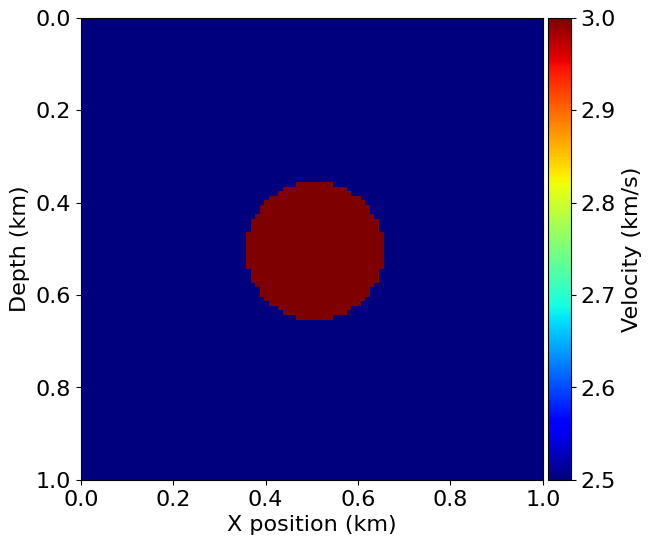

In [5]:
plot_velocity(model1)

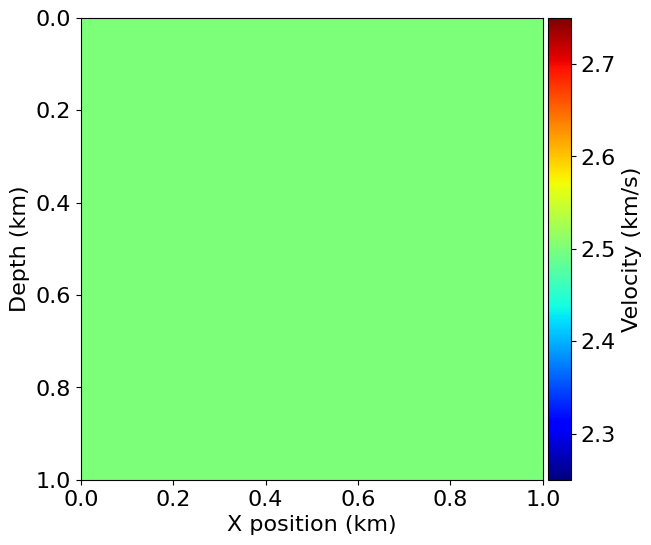

In [6]:
plot_velocity(model0)

In [7]:
from examples.seismic import AcquisitionGeometry
import numpy as np

# Set up acquisiton geometry
t0 = 0.
tn = 1000. 
f0 = 0.010

# Set up source geometry, but define 5 sources instead of just one.
nsources = 5
src_coordinates = np.empty((nsources, 2))
src_coordinates[:, 1] = np.linspace(0, model1.domain_size[0], num=nsources)
src_coordinates[:, 0] = 20.  # Source depth is 20m

# Initialize receivers for synthetic and imaging data
nreceivers = 101
rec_coordinates = np.empty((nreceivers, 2))
rec_coordinates[:, 1] = np.linspace(spacing[0], model1.domain_size[0] - spacing[0], num=nreceivers)
rec_coordinates[:, 0] = 980.    # Receiver depth
# Set up geometry objects for observed and predicted data
geometry1 = AcquisitionGeometry(model1, rec_coordinates, src_coordinates, t0, tn, f0=f0, src_type='Ricker')
geometry0 = AcquisitionGeometry(model0, rec_coordinates, src_coordinates, t0, tn, f0=f0, src_type='Ricker')

TypeError: memoryview: invalid slice key

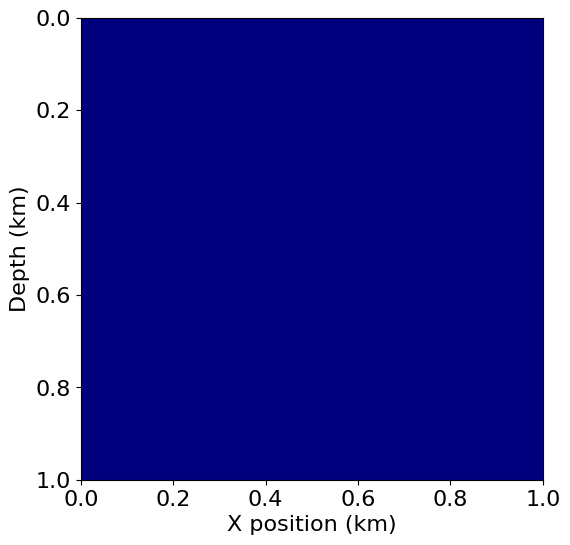

In [9]:
plot_velocity(model0, source=src_coordinates.data,
              receiver=rec_coordinates.data)